In [2]:
# 주피터 노트북에서 그림을 바로 띄워주도록 합니다. 
%matplotlib inline
# 실습을 위해 필요한 패키지를 불러옵니다. 
# 수학연산에 필요한 numpy, 데이터를 분석하는데 도움을 주는 패키지 pandas, 
# 학습결과를 그래프로 그려주는 matplotlib의 pyplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Dataset
선형 회귀에 사용할 데이터셋 만들기   
0도에서 100도 사이의 값을 갖는 섭씨온도 데이터를 100개 만든다 -> feature가 됨

In [4]:
C = np.random.randint(low = 0, high = 100, size = 100)
C

array([ 8, 69, 24, 47, 60, 56, 12, 37, 38, 78, 58, 77, 92, 97, 16, 74, 53,
       72, 94, 71, 62, 89, 86, 20, 48, 46, 73, 25, 92,  7, 22, 15, 38, 46,
       20, 75, 93, 26, 60, 70, 83, 16, 20,  6, 86,  0, 28, 30, 88, 71, 52,
       31, 77, 83, 80, 12, 44, 35, 57,  0, 91, 59, 82, 56, 63, 97, 13, 12,
       82, 73, 28, 93, 91, 68, 96, 68, 98, 49, 17, 76, 37, 38, 45, 89, 40,
       67, 83,  4, 55, 94, 97, 54,  6, 58,  4, 60, 87, 29, 92, 24])

In [5]:
F = C * 1.8 + 32
F

array([ 46.4, 156.2,  75.2, 116.6, 140. , 132.8,  53.6,  98.6, 100.4,
       172.4, 136.4, 170.6, 197.6, 206.6,  60.8, 165.2, 127.4, 161.6,
       201.2, 159.8, 143.6, 192.2, 186.8,  68. , 118.4, 114.8, 163.4,
        77. , 197.6,  44.6,  71.6,  59. , 100.4, 114.8,  68. , 167. ,
       199.4,  78.8, 140. , 158. , 181.4,  60.8,  68. ,  42.8, 186.8,
        32. ,  82.4,  86. , 190.4, 159.8, 125.6,  87.8, 170.6, 181.4,
       176. ,  53.6, 111.2,  95. , 134.6,  32. , 195.8, 138.2, 179.6,
       132.8, 145.4, 206.6,  55.4,  53.6, 179.6, 163.4,  82.4, 199.4,
       195.8, 154.4, 204.8, 154.4, 208.4, 120.2,  62.6, 168.8,  98.6,
       100.4, 113. , 192.2, 104. , 152.6, 181.4,  39.2, 131. , 201.2,
       206.6, 129.2,  42.8, 136.4,  39.2, 140. , 188.6,  84.2, 197.6,
        75.2])

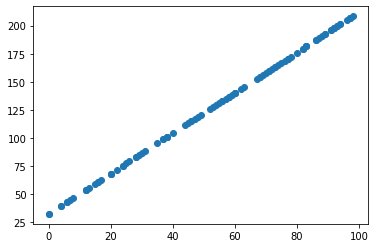

In [6]:
plt.scatter(C,F)

In [42]:
'''
18과 32를 모르는 상태에서 이 곱해지고 더해지는 값을 찾고싶다
w == weight (가중치)
b == bias (편향)

y = wx + b
'''
#랜덤한 값 중에 예측해보자!

X = C
y = F

#w = np.random.uniform(low = -1.0, high = +1.0)
w = 1.8
b = np.random.uniform(low = -1.0, high = +1.0)

w,b

(1.8, -0.1538738282585166)

In [43]:
#F = 1.8* C + 32

y_predict = w * X + b
y_predict[0:10]

array([ 14.24612617, 124.04612617,  43.04612617,  84.44612617,
       107.84612617, 100.64612617,  21.44612617,  66.44612617,
        68.24612617, 140.24612617])

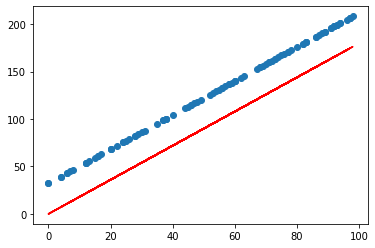

In [44]:
# 이 둘의 차이를 보정해 나가면서 없애서 값을 찾고싶다!
plt.scatter(C,F)
plt.plot(C,y_predict, c='r')

In [45]:
# 정답과 예측값의 차이를 보정해주면 32에 도달할 것이다
b = b - (y_predict - y).mean()

w,b

(1.8, 31.99999999999999)

In [46]:
y_predict = w * X + b
y_predict[0:10]

array([ 46.4, 156.2,  75.2, 116.6, 140. , 132.8,  53.6,  98.6, 100.4,
       172.4])

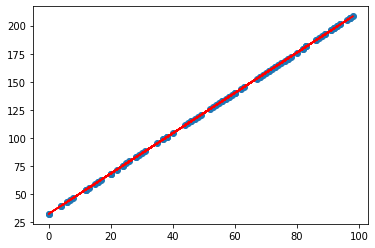

In [47]:
# 이 둘의 차이를 보정해 나가면서 없애서 값을 찾고싶다!
plt.scatter(C,F)
plt.plot(C,y_predict, c='r')

### weight,bias 값 찾기
w는 여러개일 수 있고 b는 한개 

In [81]:
w = np.random.uniform(low = -1.0, high = +1.0)
b = np.random.uniform(low = -1.0, high = +1.0)

w,b

(0.3445854548703091, -0.8070754776831315)

In [82]:
y_predict = w * X + b
y_predict[0:10]

array([ 1.94960816, 22.96932091,  7.46297544, 15.3884409 , 19.86805181,
       18.48971   ,  3.32794998, 11.94258635, 12.28717181, 26.07059   ])

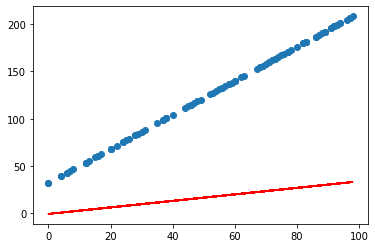

In [83]:
plt.scatter(C,F)
plt.plot(C,y_predict, c='r')

In [84]:
# 기울기가 생기는 순간 너무 많이 변하면 안되니까 좀 줄여주는 하이퍼 파라미터
learning_rate = 0.0003

#이걸 여러번 반복문으로 업데이트 시켜줘야함
w = w - learning_rate * ((y_predict-y)*X).mean()
b = b - learning_rate * (y_predict-y).mean()

w,b

(2.5355593759783783, -0.7735683145360177)

In [85]:
y_predict = w * X + b
y_predict[0:10]

array([ 19.51090669, 174.18002863,  60.07985671, 118.39772236,
       151.35999424, 141.21775674,  29.6531442 ,  93.0421286 ,
        95.57768797, 197.00006301])

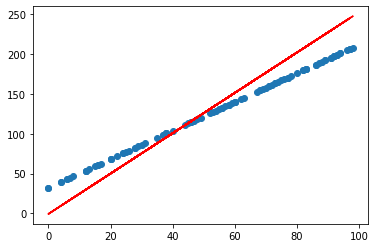

In [86]:
plt.scatter(C,F)
plt.plot(C,y_predict, c='r')

In [99]:
num_epoch = 100000
# 기울기가 생기는 순간 너무 많이 변하면 안되니까 좀 줄여주는 하이퍼 파라미터
learning_rate = 0.0003

w = np.random.uniform(low = -1.0, high = +1.0)
b = np.random.uniform(low = -1.0, high = +1.0)

#이걸 여러번 반복문으로 업데이트 시켜줘야함
for epoch in range(num_epoch):
    y_predict = w * X + b
    w = w - learning_rate * ((y_predict-y)*X).mean()
    b = b - learning_rate * (y_predict-y).mean()
    
    if(epoch % 10000 == 0) :
        print(f"w = {w:.6f}, b = {b:.6f}")

w = 2.642087, b = -0.488187
w = 2.035421, b = 15.511808
w = 1.919459, b = 23.633411
w = 1.860617, b = 27.754549
w = 1.830759, b = 29.845734
w = 1.815608, b = 30.906863
w = 1.807920, b = 31.445310
w = 1.804019, b = 31.718534
w = 1.802039, b = 31.857176
w = 1.801035, b = 31.927527


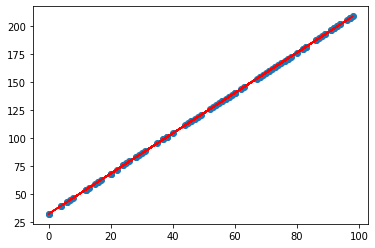

In [100]:
plt.scatter(C,F)
plt.plot(C,y_predict, c='r')

--2-3